This tutorial illustrates how to use this repo to learn a graph's adjancecy matrix $W$ of size $n \times n$ on a prespecified set of nodes $V=\{v_1,...,v_n\}$ by using a collection of signals $\{f_j\}_{j=1}^m$ defined on $V$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, plotting
from scipy.spatial.distance import pdist, squareform

# import module gl_models.py in package src/
import src.gl_models as gl

Create a collection of signals $\{f_1,f_2,f_3,f_4\}$ on a set of n randomly distributed $(x_i,y_i), i=1,...,n$ coordinates, and let $V=\{(x_i,y_i),i=1,...,n\}$. Then form a data matrix $X$ of size $n \times 4$ with columns defined by the signals.

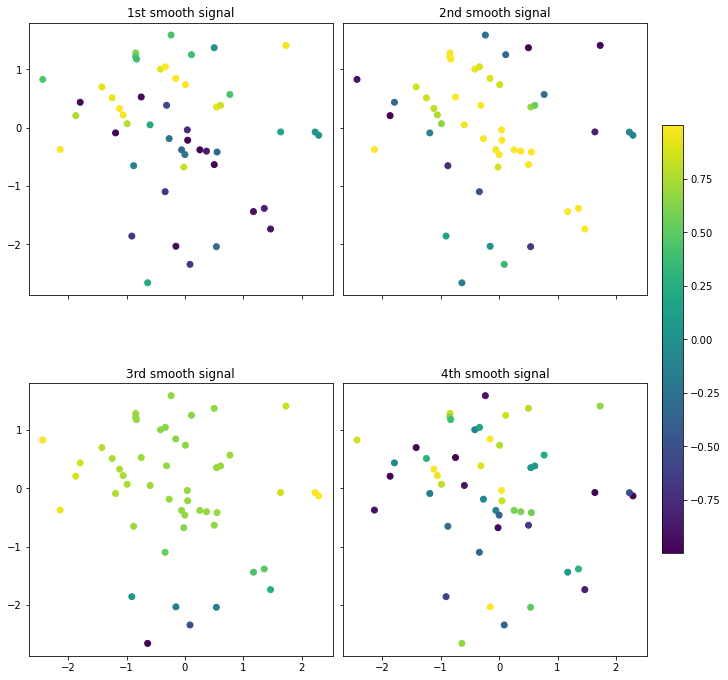

In [6]:
n = 50
np.random.seed(2)
x = np.random.randn(n,1)
y = np.random.randn(n,1)

# Define signals as a function of x,y coordinates
f1 = lambda x, y: np.sin((2-x-y)**2)
f2 = lambda x, y: np.cos((x+y)**2)
f3 = lambda x, y: (x-.5)**2 + (y-.5)**3 + x - y
f4 = lambda x, y: np.sin(3*((x-.5)**2+(y-.5)**2))

# Define data matrix 
X = np.hstack((f1(x,y),f2(x,y),f3(x,y),f4(x,y)))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True, constrained_layout=True)
img = ax[0, 0].scatter(x,y, c = X[:,0]); ax[0, 0].set_title('1st smooth signal'); ax[0, 0].set_aspect(1)
ax[0, 1].scatter(x,y, c = X[:,1]); ax[0, 1].set_title('2nd smooth signal'); ax[0, 1].set_aspect(1) 
ax[1, 0].scatter(x,y, c = X[:,2]); ax[1, 0].set_title('3rd smooth signal'); ax[1, 0].set_aspect(1)
ax[1, 1].scatter(x,y, c = X[:,3]); ax[1, 1].set_title('4th smooth signal'); ax[1, 1].set_aspect(1)
fig.colorbar(img, ax=ax[:, 1], shrink = 0.6)

Given $X$, compute a pair wise distance matrix $Z$ and feed it into the graph learning model to produce a graph with adjacency matrix $W$ on which the given signals are smooth to an extent control by $\theta$.

# iters:  459  Rel primal:  9.697133162407181e-07  Rel dual:  3.4611051447284696e-07  OBJ:  [[37.78761422]] 

Time needed is  0.07298946380615234  seconds

avg. node degree : 5.64
False


<Figure size 432x288 with 0 Axes>

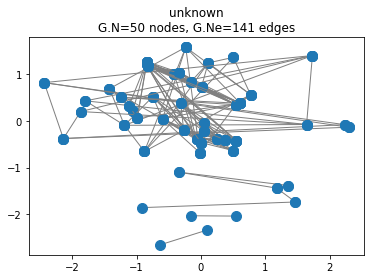

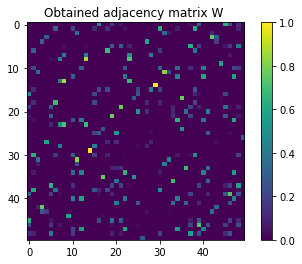

In [7]:
# Compute pair wise distance matrix 
z = pdist(X, 'euclidean') # distance matrix condensed form
Z = squareform(z) # turns the condensed form into a 4 by 4 distance matrix

# Define graph learning model parameters
k = 5 # average node degree of resulting unweighted graph
theta = gl.estimate_theta(Z,k)
a = 1
b = 1
params = {'maxit':2000, 'tol':1e-6}
W = gl.gsp_learn_graph_log_degrees(theta*Z,a,b,params)
W[W<1e-5] = 0
W = W/np.max(W[W>0])

print('avg. node degree :', np.mean(np.sum(W>0,axis=1)))

# Plot obtained graph structure using the gsp toolbox
plt.figure()
G = graphs.Graph(W)
G.set_coordinates(np.hstack((x,y)))
G.plot()
print(G.is_connected())

# Plot obtained adjacency matrix
plt.figure()
ax0 = plt.gca()
img = ax0.imshow(W)
ax0.set_title('Obtained adjacency matrix W ')
plt.colorbar(img, ax = ax0)
